# ISTA Algorithm for deriving linear model from (x1 , y1) = (0,0) and               (x2,y2) = (1,1)

### Goal : To find Beta Vector elements i.e Beta_0(Intercept) and Beta_1(slope)

In [152]:
%config Completer.use_jedi=False

In [78]:
import time
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

#soft threshold function for sparsity
def soft_thresh(x, l):
    return np.sign(x) * np.maximum(np.abs(x) - l, 0.)


#defining insta algorithm
def ista(A, b, l, maxit):
#    x= np.array([[0],[0],[0],[0],[0],[0],[0],[0]])
    loss= []
    x= np.array([[0],[0]])
    time0 = time.time()
#     for i in range(2):
#         b[i]=[]
#     print(time0)

    b0=[]
    b1=[]
#     b2=[]
#     b3=[]
#     b4=[]
#     b5=[]
#     b6=[]
#     b7=[]
    
    #print(x.shape)
    A_T = A.transpose()
    #print(A_T)
    L = linalg.norm(A) **2
    #print(L)
    for _ in range(maxit):
        x = soft_thresh(x - (np.dot(A_T , (np.dot(A,x)  - b)))* (1/L) , l/L)
        print(x)
        this_loss = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
        loss.append((time.time() - time0, this_loss))
        #print(pobj)
#         for i in range(2):
#             b[i].append(x[i])
        
        b0.append(x[0])
        b1.append(x[1])
#         b2.append(x[2])
#         b3.append(x[3])
#         b4.append(x[4])
#         b5.append(x[5])
#         b6.append(x[6])
#         b7.append(x[7])
    #print('This is b0 ' , b0)
    #print('This is b1 ' , b1)
    #print(x)
    times, cost = map(np.array, zip(*loss))
    #print('The value of B0 and B1 is : ')
    return x, b0 , b1,cost, times
#    return x, b0 , b1, b2, b3, b4 , b5 , b6 , b7 ,cost, times

## Printing  the value of Beta i.e Beta_0 (Intercept) and Beta_1(Slope) for each iteration in vector form obtained from the ISTA algorithm 

In [79]:
# A = np.array([[1,0], [1,1], [1,2] , [1, 3], [1, 0.4] , [1 , 0.5] , [1, 0.3]])
# b = np.array([[1], [-1] , [-2], [-3], [-0.4], [-0.5], [-0.3]])
A = np.array([[1,0], [1,1]])
b = np.array([[0], [-1]])
#A = np.array([[np.cosh(0), np.sinh(0)], [np.cosh(1), np.sinh(1)]])
print(A)
#print(np.abs(A) - 1)
#b = np.array([[1], [0.368]])
print(b)
# # X = np.squeeze(np.array([[1,0], [1,1]]))
# # y = np.squeeze(np.array([[0],[1]]))
l=0.001
#x, b0 , b1, b2, b3, b4 , b5 , b6 , b7 , cost, times= ista(A, b, l, 50)
x, b0,b1, cost, times = ista(A, b, l, 30)


[[1 0]
 [1 1]]
[[ 0]
 [-1]]
[[-0.333]
 [-0.333]]
[[-0.333]
 [-0.444]]
[[-0.296]
 [-0.518]]
[[-0.259     ]
 [-0.57966667]]
[[-0.22611111]
 [-0.63311111]]
[[-0.19733333]
 [-0.6797037 ]]
[[-0.17220988]
 [-0.72035802]]
[[-0.15028395]
 [-0.75583539]]
[[-0.13114952]
 [-0.78679561]]
[[-0.1144513]
 [-0.8138139]]
[[-0.09987913]
 [-0.83739217]]
[[-0.08716232]
 [-0.8579684 ]]
[[-0.07606464]
 [-0.87592483]]
[[-0.06637994]
 [-0.891595  ]]
[[-0.05792831]
 [-0.90527002]]
[[-0.05055276]
 [-0.91720391]]
[[-0.04411628]
 [-0.92761835]]
[[-0.03849931]
 [-0.93670681]]
[[-0.0335975]
 [-0.9446381]]
[[-0.0293198 ]
 [-0.95155957]]
[[-0.02558674]
 [-0.95759978]]
[[-0.02232899]
 [-0.96287094]]
[[-0.01948602]
 [-0.96747096]]
[[-0.01700502]
 [-0.9714853 ]]
[[-0.01483991]
 [-0.97498853]]
[[-0.01295046]
 [-0.97804572]]
[[-0.01130158]
 [-0.98071366]]
[[-0.00986264]
 [-0.98304191]]
[[-0.00860691]
 [-0.98507373]]
[[-0.00751106]
 [-0.98684685]]


## Plotting the graph between Beta_0 and Beta_1

In [80]:
b1[-1]

array([-0.98684685])

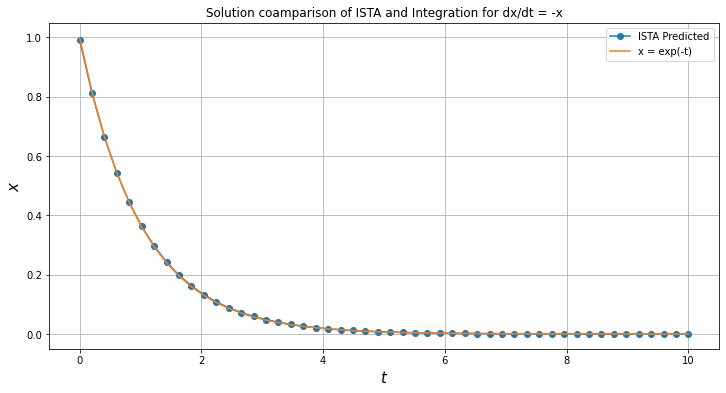

In [84]:
x = np.linspace(0,10,50)
y = np.linspace(0,10,50)
# #plt.plot(x,y)
# for i in range(9):
#     y = (bi[49])*(x**i)
#y= b0[49]*np.cosh(x) + b1[49]*np.sinh(x)
y = b0[-1] +  b1[-1]*x 
#y = b0[49] +  b1[49]*x + b2[49]*(x**2) +  b3[49]*(x**3)+ b4[49]*(x**4)+  b5[49]*(x**5)+ b6[49]*(x**6) +  b7[49]*(x**7)
fig = plt.figure(figsize =(12, 6))
#plt.plot(x, y , label= 'ISTA Predicted order 3')

plt.plot(x, np.exp(y) , marker ='o', label= 'ISTA Predicted')
plt.plot(x , np.exp(-x) , label = 'x = exp(-t)')
plt.legend()
# plt.xlim(-1, 1)
# plt.ylim(-1,1)

plt.title('Solution coamparison of ISTA and Integration for dx/dt = -x')
plt.ylabel('$x$',fontsize=15)
plt.xlabel('$t$',fontsize=15)
plt.grid()
plt.show()

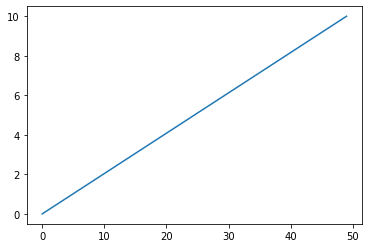

In [6]:
plt.plot(x)

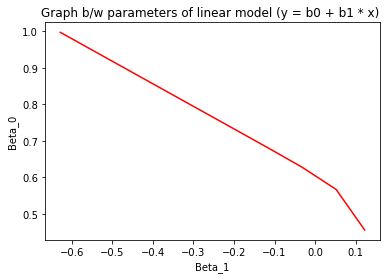

In [81]:
plt.plot(b1, b0 ,'r')
plt.title('Graph b/w parameters of linear model (y = b0 + b1 * x) ')
plt.xlabel('Beta_1')
plt.ylabel('Beta_0')
plt.show()

# Plotting the value of objective function with every iteration

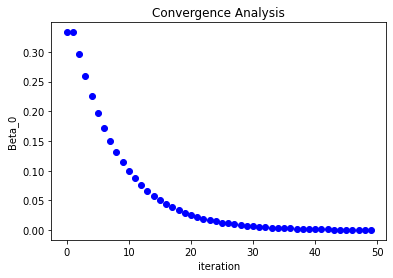

In [52]:
itr  = np.arange(50)
plt.scatter(itr,b0, c = 'b')
plt.title('Convergence Analysis')
plt.xlabel('iteration')
plt.ylabel('Beta_0')
plt.show()

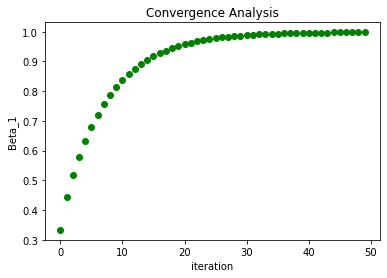

In [53]:
plt.scatter(itr,b1, c = 'g')
plt.title('Convergence Analysis')
plt.xlabel('iteration')
plt.ylabel('Beta_1')
plt.show()

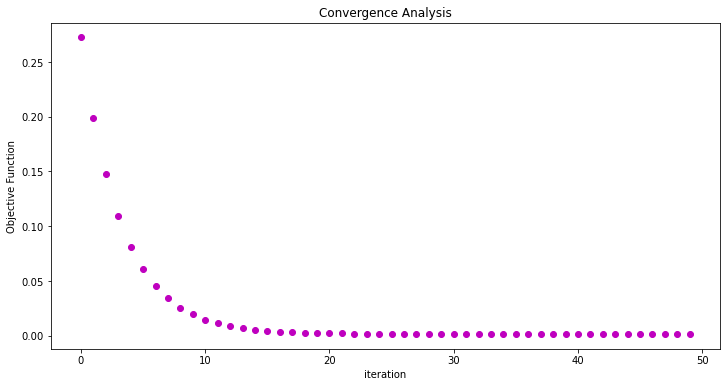

In [22]:
fig = plt.figure( figsize = (12,6))
itr  = np.arange(50)
plt.scatter(itr,cost, c = 'm')
plt.title('Convergence Analysis')
plt.xlabel('iteration')
plt.ylabel('Objective Function')
plt.show()

# Plotting the value of objective function with time in seconds

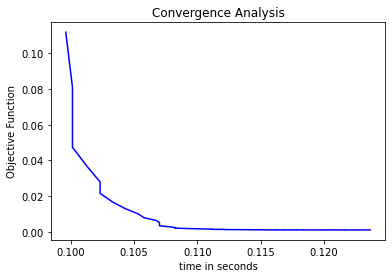

In [7]:
plt.plot(times,cost,'b')
plt.title('Convergence Analysis')
plt.xlabel('time in seconds')
plt.ylabel('Objective Function')
plt.show()

In [36]:
import autograd
from autograd.builtins import tuple
import autograd.numpy as np

#Import ode solver and rename as BlackBox for consistency with blog
from scipy.integrate import odeint as BlackBox
import matplotlib.pyplot as plt

In [37]:
def f(y,t,theta):
    '''Function describing dynamics of the system'''
    S,I = y
    ds = -theta*S*I
    di = theta*S*I - I

    return np.array([ds,di])

In [38]:
#Jacobian of f wrt y
J = autograd.jacobian(f,argnum=0)
#Gradient of f wrt theta
grad_f_theta = autograd.jacobian(f,argnum=2)

In [49]:
theta = 5.5
arg = tuple([theta])
arg.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [40]:
def ODESYS(Y,t,theta):

    #Y will be length 4.
    #Y[0], Y[1] are the ODEs
    #Y[2], Y[3] are the sensitivities

    #ODE
    dy_dt = f(Y[0:2],t,theta)
    #Sensitivities
    grad_y_theta = J(Y[:2],t,theta)@Y[-2::] + grad_f_theta(Y[:2],t,theta)

    return np.concatenate([dy_dt,grad_y_theta])

In [41]:
def Cost(y_obs):
    def cost(Y):
        '''Squared Error Loss'''
        n = y_obs.shape[0]
        err = np.linalg.norm(y_obs - Y, 2, axis = 1)

        return np.sum(err)/n

    return cost

[[ 9.90000000e-01  1.00000000e-02  0.00000000e+00  0.00000000e+00]
 [ 9.86956354e-01  1.24838047e-02 -6.30378434e-04  6.16038527e-04]
 [ 9.83171629e-01  1.55699629e-02 -1.59719480e-03  1.53062615e-03]
 [ 9.78474327e-01  1.93965094e-02 -3.02009888e-03  2.84602974e-03]
 [ 9.72658154e-01  2.41287067e-02 -5.05105739e-03  4.69107155e-03]
 [ 9.65477631e-01  2.99620017e-02 -7.87909121e-03  7.22445996e-03]
 [ 9.56644560e-01  3.71239755e-02 -1.17334707e-02  1.06364154e-02]
 [ 9.45826613e-01  4.58741679e-02 -1.68832697e-02  1.51467046e-02]
 [ 9.32649267e-01  5.65005932e-02 -2.36308793e-02  2.09968276e-02]
 [ 9.16703209e-01  6.93111151e-02 -3.22958528e-02  2.84331579e-02]
 [ 8.97559351e-01  8.46177868e-02 -4.31854084e-02  3.76778681e-02]
 [ 8.74793886e-01  1.02712170e-01 -5.65482253e-02  4.88849721e-02]
 [ 8.48024948e-01  1.23830519e-01 -7.25109268e-02  6.20816225e-02]
 [ 8.16960983e-01  1.48109264e-01 -9.10015000e-02  7.70995810e-02]
 [ 7.81457620e-01  1.75534370e-01 -1.11672226e-01  9.35095905e

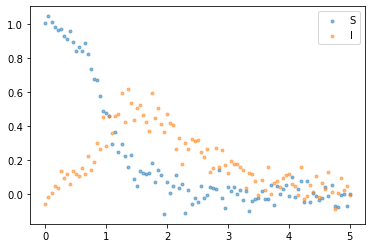

In [42]:
np.random.seed(19920908)
## Generate Data
#Initial Condition
Y0 = np.array([0.99,0.01, 0.0, 0.0])
#Space to compute solutions
t = np.linspace(0,5,101)
#True param value
theta = 5.5

sol = BlackBox(ODESYS, y0 = Y0, t = t, args = tuple([theta]))
print(sol)
print(sol[:,:2])

#Corupt the observations with noise
y_obs = sol[:,:2] + np.random.normal(0,0.05,size = sol[:,:2].shape)

plt.scatter(t,y_obs[:,0], marker = '.', alpha = 0.5, label = 'S')
plt.scatter(t,y_obs[:,1], marker = '.', alpha = 0.5, label = 'I')


plt.legend()

In [43]:
theta_iter = 1.5
cost = Cost(y_obs[:,:2])
grad_C = autograd.grad(cost)

maxiter = 100
learning_rate = 1 #Big steps
for i in range(maxiter):

    sol = BlackBox(ODESYS,y0 = Y0, t = t, args = tuple([theta_iter]))

    Y = sol[:,:2]

    theta_iter -=learning_rate*(grad_C(Y)*sol[:,-2:]).sum()

    if i%10==0:
        print(theta_iter)

print('YYYEAAAAHHH!')

1.697027594337629
3.918906027837038
4.810038385538704
5.251499985105974
5.427206219478128
5.469577060684733
5.477446435413983
5.479219468527155
5.4796368171243035
5.4797359952506035
YYYEAAAAHHH!


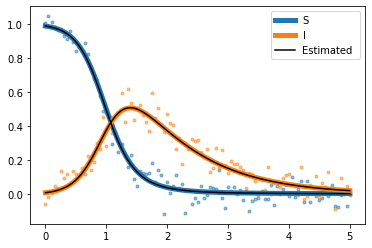

In [44]:
sol = BlackBox(ODESYS, y0 = Y0, t = t, args = tuple([theta_iter]))
true_sol = BlackBox(ODESYS, y0 = Y0, t = t, args = tuple([theta]))


plt.plot(t,sol[:,0], label = 'S', color = 'C0', linewidth = 5)
plt.plot(t,sol[:,1], label = 'I', color = 'C1', linewidth = 5)

plt.scatter(t,y_obs[:,0], marker = '.', alpha = 0.5)
plt.scatter(t,y_obs[:,1], marker = '.', alpha = 0.5)


plt.plot(t,true_sol[:,0], label = 'Estimated ', color = 'k')
plt.plot(t,true_sol[:,1], color = 'k')

plt.legend()

In [32]:
import time
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

#soft threshold function for sparsity
def soft_thresh(x, l):
    return np.sign(x) * np.maximum(np.abs(x) - l, 0.)


#defining insta algorithm
def ista(A, b, l, maxit):
    x= np.array([[0], [0]])
    loss= []
    time0 = time.time()
#     print(time0)
    
    b0=[]
    b1=[]
    #print(x.shape)
    A_T = A.transpose()
    #print(A_T)
    L = linalg.norm(A) **2
    #print(L)
    for _ in range(maxit):
        x = soft_thresh(x - (np.dot(A_T , (np.dot(A,x)  - b)))* (1/L) , l/L)
        print(x)
        this_loss = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
        loss.append((time.time() - time0, this_loss))
        #print(pobj)
        b0.append(x[0])
        b1.append(x[1])
    #print('This is b0 ' , b0)
    #print('This is b1 ' , b1)
    times, cost = map(np.array, zip(*loss))
    #print('The value of B0 and B1 is : ')
    return x , b0 , b1, cost, times

In [38]:
A = np.array([[1,0], [1,0.693]])
#print(np.abs(A) - 1)
b = np.array([[0], [1]])
#print(b)
# X = np.squeeze(np.array([[1,0], [1,1]]))
# y = np.squeeze(np.array([[0],[1]]))
l=0.001
x, b0, b1, cost, times = ista(A, b, l, 50)


[[0.40278214]
 [0.27900425]]
[[0.40281672]
 [0.39144476]]
[[0.37140671]
 [0.48210382]]
[[0.33999399]
 [0.56398482]]
[[0.3110334 ]
 [0.63878821]]
[[0.28452516]
 [0.70719926]]
[[0.26027783]
 [0.76977053]]
[[0.23809996]
 [0.82700105]]
[[0.21781504]
 [0.87934672]]
[[0.19926152]
 [0.92722449]]
[[0.18229161]
 [0.97101571]]
[[0.16677014]
 [1.01106919]]
[[0.15257349]
 [1.04770395]]
[[0.13958858]
 [1.08121179]]
[[0.12771198]
 [1.11185962]]
[[0.11684909]
 [1.13989153]]
[[0.10691339]
 [1.16553082]]
[[0.09782574]
 [1.18898169]]
[[0.08951375]
 [1.21043095]]
[[0.08191123]
 [1.23004943]]
[[0.07495761]
 [1.2479934 ]]
[[0.0685975 ]
 [1.26440578]]
[[0.06278026]
 [1.2794173 ]]
[[0.05745954]
 [1.29314754]]
[[0.05259296]
 [1.30570585]]
[[0.04814177]
 [1.31719225]]
[[0.0440705 ]
 [1.32769825]]
[[0.04034672]
 [1.33730752]]
[[0.03694079]
 [1.34609661]]
[[0.03382557]
 [1.35413551]]
[[0.03097624]
 [1.36148826]]
[[0.02837011]
 [1.36821343]]
[[0.02598643]
 [1.37436458]]
[[0.0238062 ]
 [1.37999071]]
[[0.02181206]


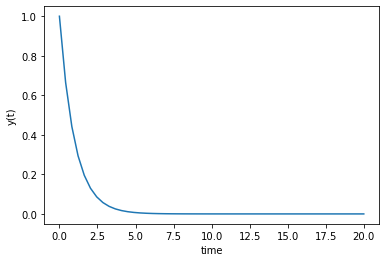

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 1
    dydt = -k * y
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()